In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder


In [2]:
data=pd.read_csv(r"C:\shan_ML\insurance_claim_approval.csv")
data

,Customer_ID,Age,Gender,Employment_Status,Annual_Income,Dependents,Policy_Type,Policy_Duration,Premium_Amount,Coverage_Amount,Claim_Amount,Past_Claims,Time_Since_Last_Claim,Documents_Submitted,Fraud_Risk,Claim_Approval
0,1,56,Male,Employed,178721,3,Health,10,16888,27552,33684,6,118,7,Low,0
1,2,69,Female,Retired,32402,4,Auto,13,17035,321882,67808,2,56,3,Low,1
2,3,46,Female,Unemployed,122880,3,Life,18,12944,26438,59474,1,40,3,Low,0
3,4,32,Female,Self-Employed,139764,0,Auto,19,12021,278921,91288,1,26,2,Low,0
4,5,60,Male,Retired,160288,2,Health,17,3577,106794,13416,9,14,9,High,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,55,Male,Unemployed,140347,2,Health,19,13281,363330,83181,5,108,4,Low,1
9996,9997,51,Female,Employed,198042,1,Health,10,15498,308337,65288,6,40,1,Medium,0
9997,9998,57,Female,Self-Employed,127780,2,Life,5,15095,84404,81900,6,110,6,Low,1
9998,9999,64,Male,Employed,96174,3,Auto,14,8442,490830,81183,2,108,9,Low,1


In [3]:
data.head(
    
)

,Customer_ID,Age,Gender,Employment_Status,Annual_Income,Dependents,Policy_Type,Policy_Duration,Premium_Amount,Coverage_Amount,Claim_Amount,Past_Claims,Time_Since_Last_Claim,Documents_Submitted,Fraud_Risk,Claim_Approval
0,1,56,Male,Employed,178721,3,Health,10,16888,27552,33684,6,118,7,Low,0
1,2,69,Female,Retired,32402,4,Auto,13,17035,321882,67808,2,56,3,Low,1
2,3,46,Female,Unemployed,122880,3,Life,18,12944,26438,59474,1,40,3,Low,0
3,4,32,Female,Self-Employed,139764,0,Auto,19,12021,278921,91288,1,26,2,Low,0
4,5,60,Male,Retired,160288,2,Health,17,3577,106794,13416,9,14,9,High,0


In [4]:
data.tail()

,Customer_ID,Age,Gender,Employment_Status,Annual_Income,Dependents,Policy_Type,Policy_Duration,Premium_Amount,Coverage_Amount,Claim_Amount,Past_Claims,Time_Since_Last_Claim,Documents_Submitted,Fraud_Risk,Claim_Approval
9995,9996,55,Male,Unemployed,140347,2,Health,19,13281,363330,83181,5,108,4,Low,1
9996,9997,51,Female,Employed,198042,1,Health,10,15498,308337,65288,6,40,1,Medium,0
9997,9998,57,Female,Self-Employed,127780,2,Life,5,15095,84404,81900,6,110,6,Low,1
9998,9999,64,Male,Employed,96174,3,Auto,14,8442,490830,81183,2,108,9,Low,1
9999,10000,32,Female,Retired,106352,3,Life,4,17060,427602,30211,9,86,2,Low,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Customer_ID            10000 non-null  int64 
 1   Age                    10000 non-null  int64 
 2   Gender                 10000 non-null  object
 3   Employment_Status      10000 non-null  object
 4   Annual_Income          10000 non-null  int64 
 5   Dependents             10000 non-null  int64 
 6   Policy_Type            10000 non-null  object
 7   Policy_Duration        10000 non-null  int64 
 8   Premium_Amount         10000 non-null  int64 
 9   Coverage_Amount        10000 non-null  int64 
 10  Claim_Amount           10000 non-null  int64 
 11  Past_Claims            10000 non-null  int64 
 12  Time_Since_Last_Claim  10000 non-null  int64 
 13  Documents_Submitted    10000 non-null  int64 
 14  Fraud_Risk             10000 non-null  object
 15  Claim_Approval      

In [6]:
data.describe()

,Customer_ID,Age,Annual_Income,Dependents,Policy_Duration,Premium_Amount,Coverage_Amount,Claim_Amount,Past_Claims,Time_Since_Last_Claim,Documents_Submitted,Claim_Approval
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,5000.50000,43.539400,108893.052900,2.010800,9.956200,10229.032000,250806.41460,50553.493500,4.475100,60.05250,5.008500,0.637600
std,2886.89568,14.911636,51948.292231,1.410065,5.474018,5677.160808,142297.81535,28541.948905,2.876527,34.71897,2.572176,0.480718
min,1.00000,18.000000,20016.000000,0.000000,1.000000,500.000000,10025.00000,1002.000000,0.000000,0.00000,1.000000,0.000000
25%,2500.75000,31.000000,63912.750000,1.000000,5.000000,5300.750000,127616.75000,25736.250000,2.000000,30.00000,3.000000,0.000000
50%,5000.50000,43.000000,108650.500000,2.000000,10.000000,10165.500000,248436.50000,50549.500000,5.000000,61.00000,5.000000,1.000000
75%,7500.25000,56.000000,153978.000000,3.000000,15.000000,15169.000000,373027.75000,75161.500000,7.000000,90.00000,7.000000,1.000000
max,10000.00000,69.000000,199982.000000,4.000000,19.000000,19999.000000,499998.00000,99995.000000,9.000000,119.00000,9.000000,1.000000


In [7]:
data.describe(include='object')

,Gender,Employment_Status,Policy_Type,Fraud_Risk
count,10000,10000,10000,10000
unique,2,4,4,3
top,Female,Unemployed,Health,Low
freq,5022,2530,2559,7026


In [8]:
data.shape

(10000, 16)

In [9]:
data.columns

Index(['Customer_ID', 'Age', 'Gender', 'Employment_Status', 'Annual_Income',
       'Dependents', 'Policy_Type', 'Policy_Duration', 'Premium_Amount',
       'Coverage_Amount', 'Claim_Amount', 'Past_Claims',
       'Time_Since_Last_Claim', 'Documents_Submitted', 'Fraud_Risk',
       'Claim_Approval'],
      dtype='object')

In [10]:
data.dtypes

Customer_ID               int64
Age                       int64
Gender                   object
Employment_Status        object
Annual_Income             int64
Dependents                int64
Policy_Type              object
Policy_Duration           int64
Premium_Amount            int64
Coverage_Amount           int64
Claim_Amount              int64
Past_Claims               int64
Time_Since_Last_Claim     int64
Documents_Submitted       int64
Fraud_Risk               object
Claim_Approval            int64
dtype: object

In [11]:
data.isna().sum()

Customer_ID              0
Age                      0
Gender                   0
Employment_Status        0
Annual_Income            0
Dependents               0
Policy_Type              0
Policy_Duration          0
Premium_Amount           0
Coverage_Amount          0
Claim_Amount             0
Past_Claims              0
Time_Since_Last_Claim    0
Documents_Submitted      0
Fraud_Risk               0
Claim_Approval           0
dtype: int64

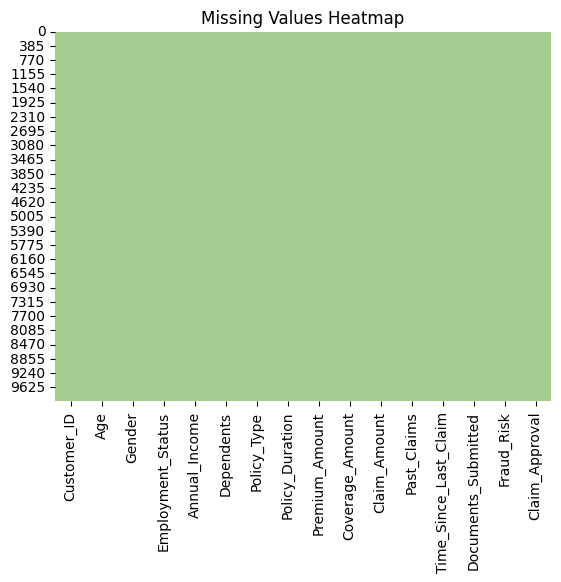

In [12]:
sns.heatmap(data.isnull(), cmap='crest', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [44]:
# Fraud_Risk, Documents_Submitted, Claim_Amount, Coverage_Amount, Past_Claims, and Policy_Type.

In [14]:
# drop unwanted columns
data.drop(['Customer_ID', 'Gender', 'Employment_Status',
       'Dependents',  'Policy_Duration', 'Premium_Amount',
       'Time_Since_Last_Claim', 
       ],axis=1,inplace=True)

In [15]:
data.duplicated().sum()

np.int64(0)

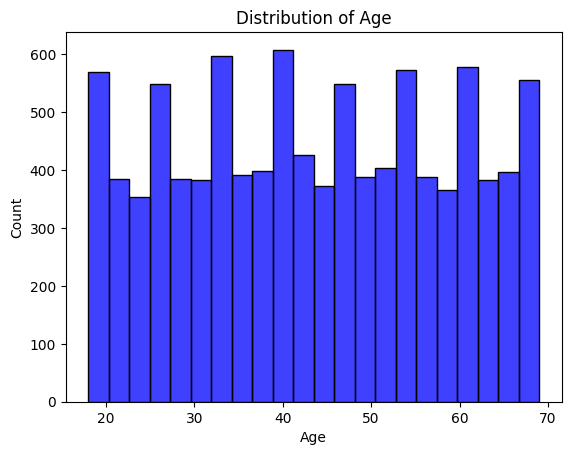

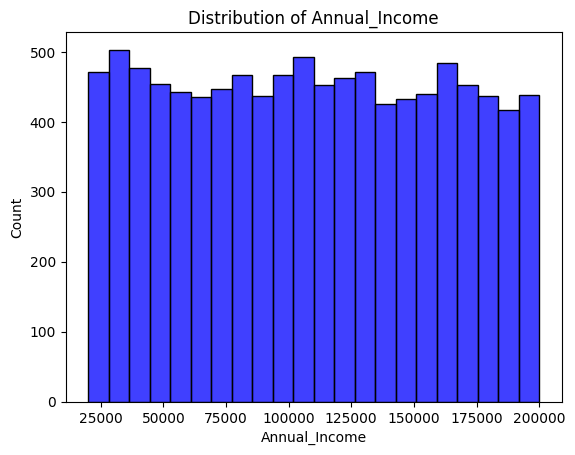

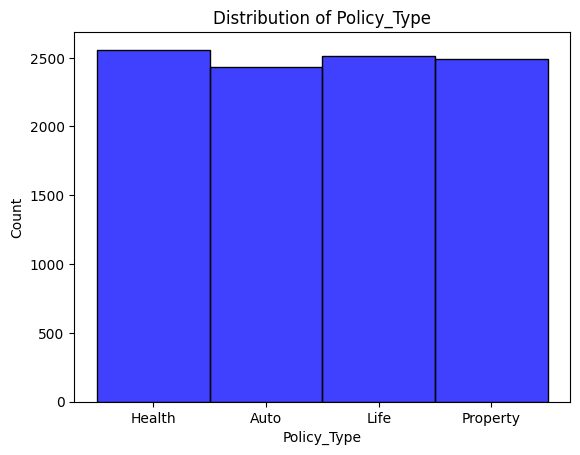

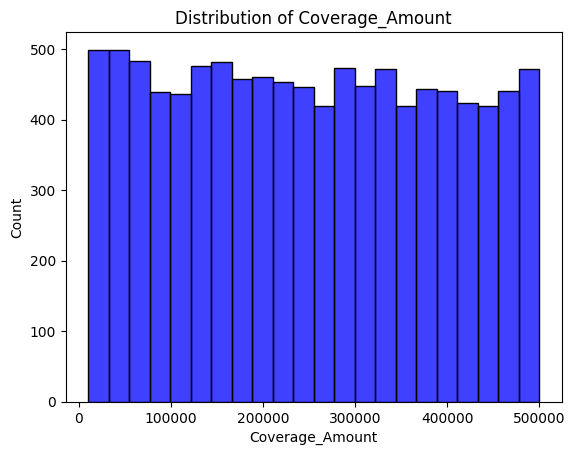

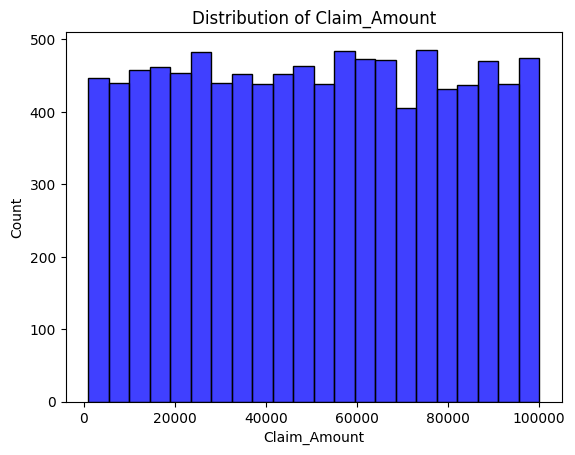

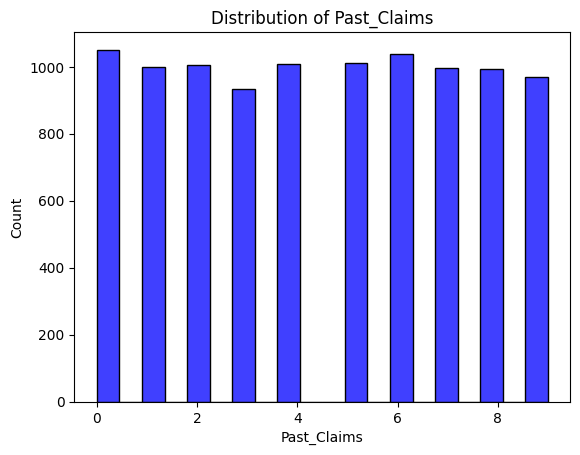

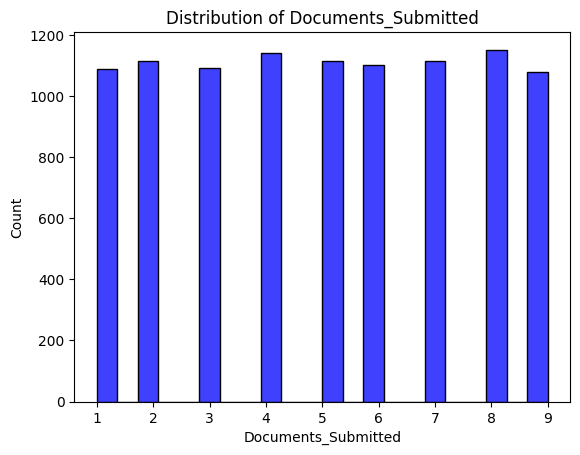

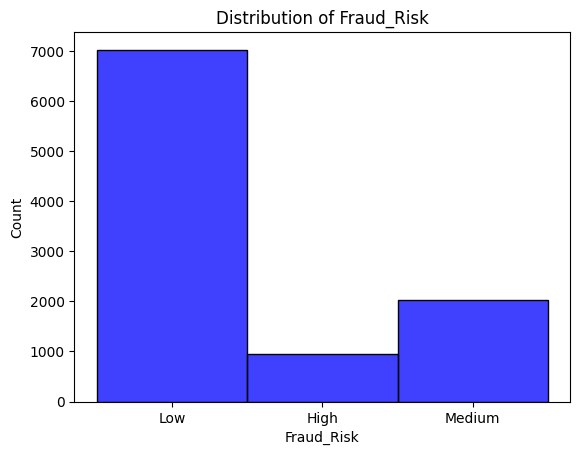

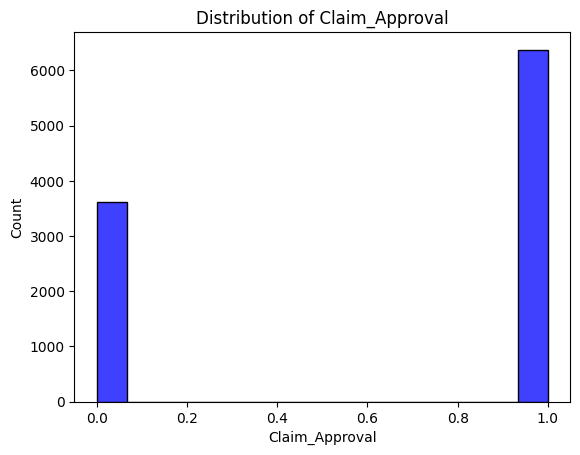

In [16]:
num_col=data.select_dtypes(include=['int64','float64','object'])
for col in num_col:
  sns.histplot(data[col],color='blue')
  plt.title(f'Distribution of {col}')   
  plt.show()

In [17]:
data.dtypes

Age                     int64
Annual_Income           int64
Policy_Type            object
Coverage_Amount         int64
Claim_Amount            int64
Past_Claims             int64
Documents_Submitted     int64
Fraud_Risk             object
Claim_Approval          int64
dtype: object

In [18]:
data['Policy_Type'].unique()

array(['Health', 'Auto', 'Life', 'Property'], dtype=object)

In [19]:
data['Fraud_Risk'].unique()

array(['Low', 'High', 'Medium'], dtype=object)

In [20]:
le=LabelEncoder()
oe=OrdinalEncoder()

data['Policy_Type']=le.fit_transform(data['Policy_Type']).astype(int)
data['Fraud_Risk']=oe.fit_transform(data[['Fraud_Risk']]).astype(int)

In [21]:
data.dtypes

Age                    int64
Annual_Income          int64
Policy_Type            int64
Coverage_Amount        int64
Claim_Amount           int64
Past_Claims            int64
Documents_Submitted    int64
Fraud_Risk             int64
Claim_Approval         int64
dtype: object

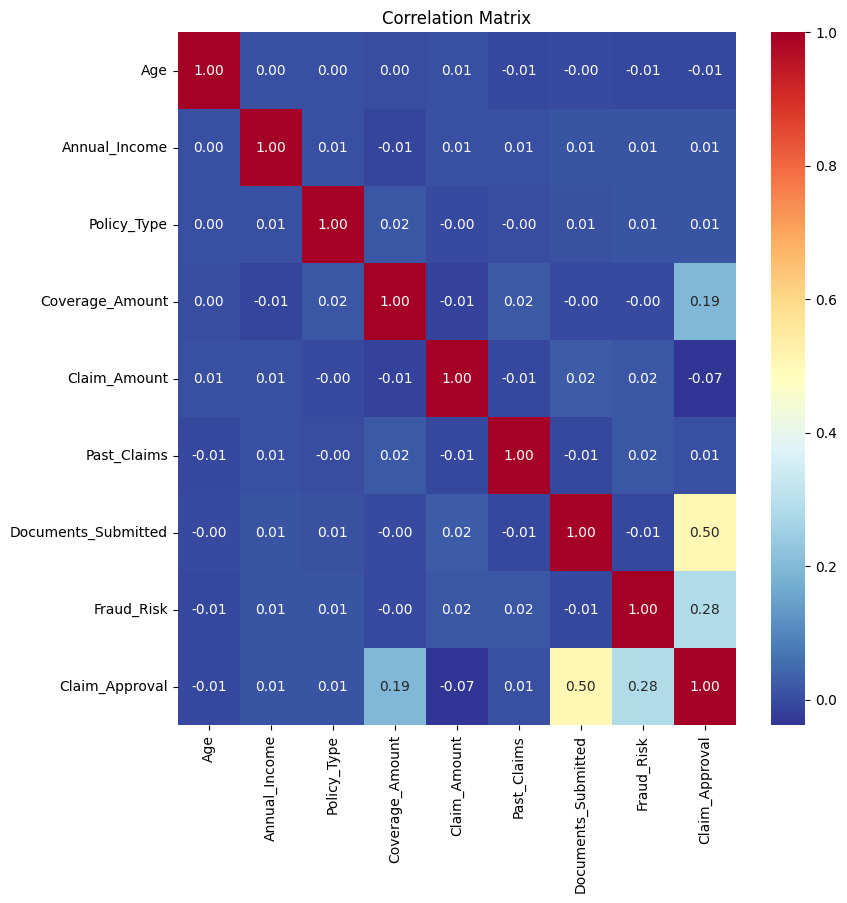

In [22]:
correlation=data.corr()
plt.figure(figsize=(9,9))
sns.heatmap(correlation,cmap='RdYlBu_r',annot=True,fmt='0.2f',robust=True)
plt.title("Correlation Matrix")
plt.show()

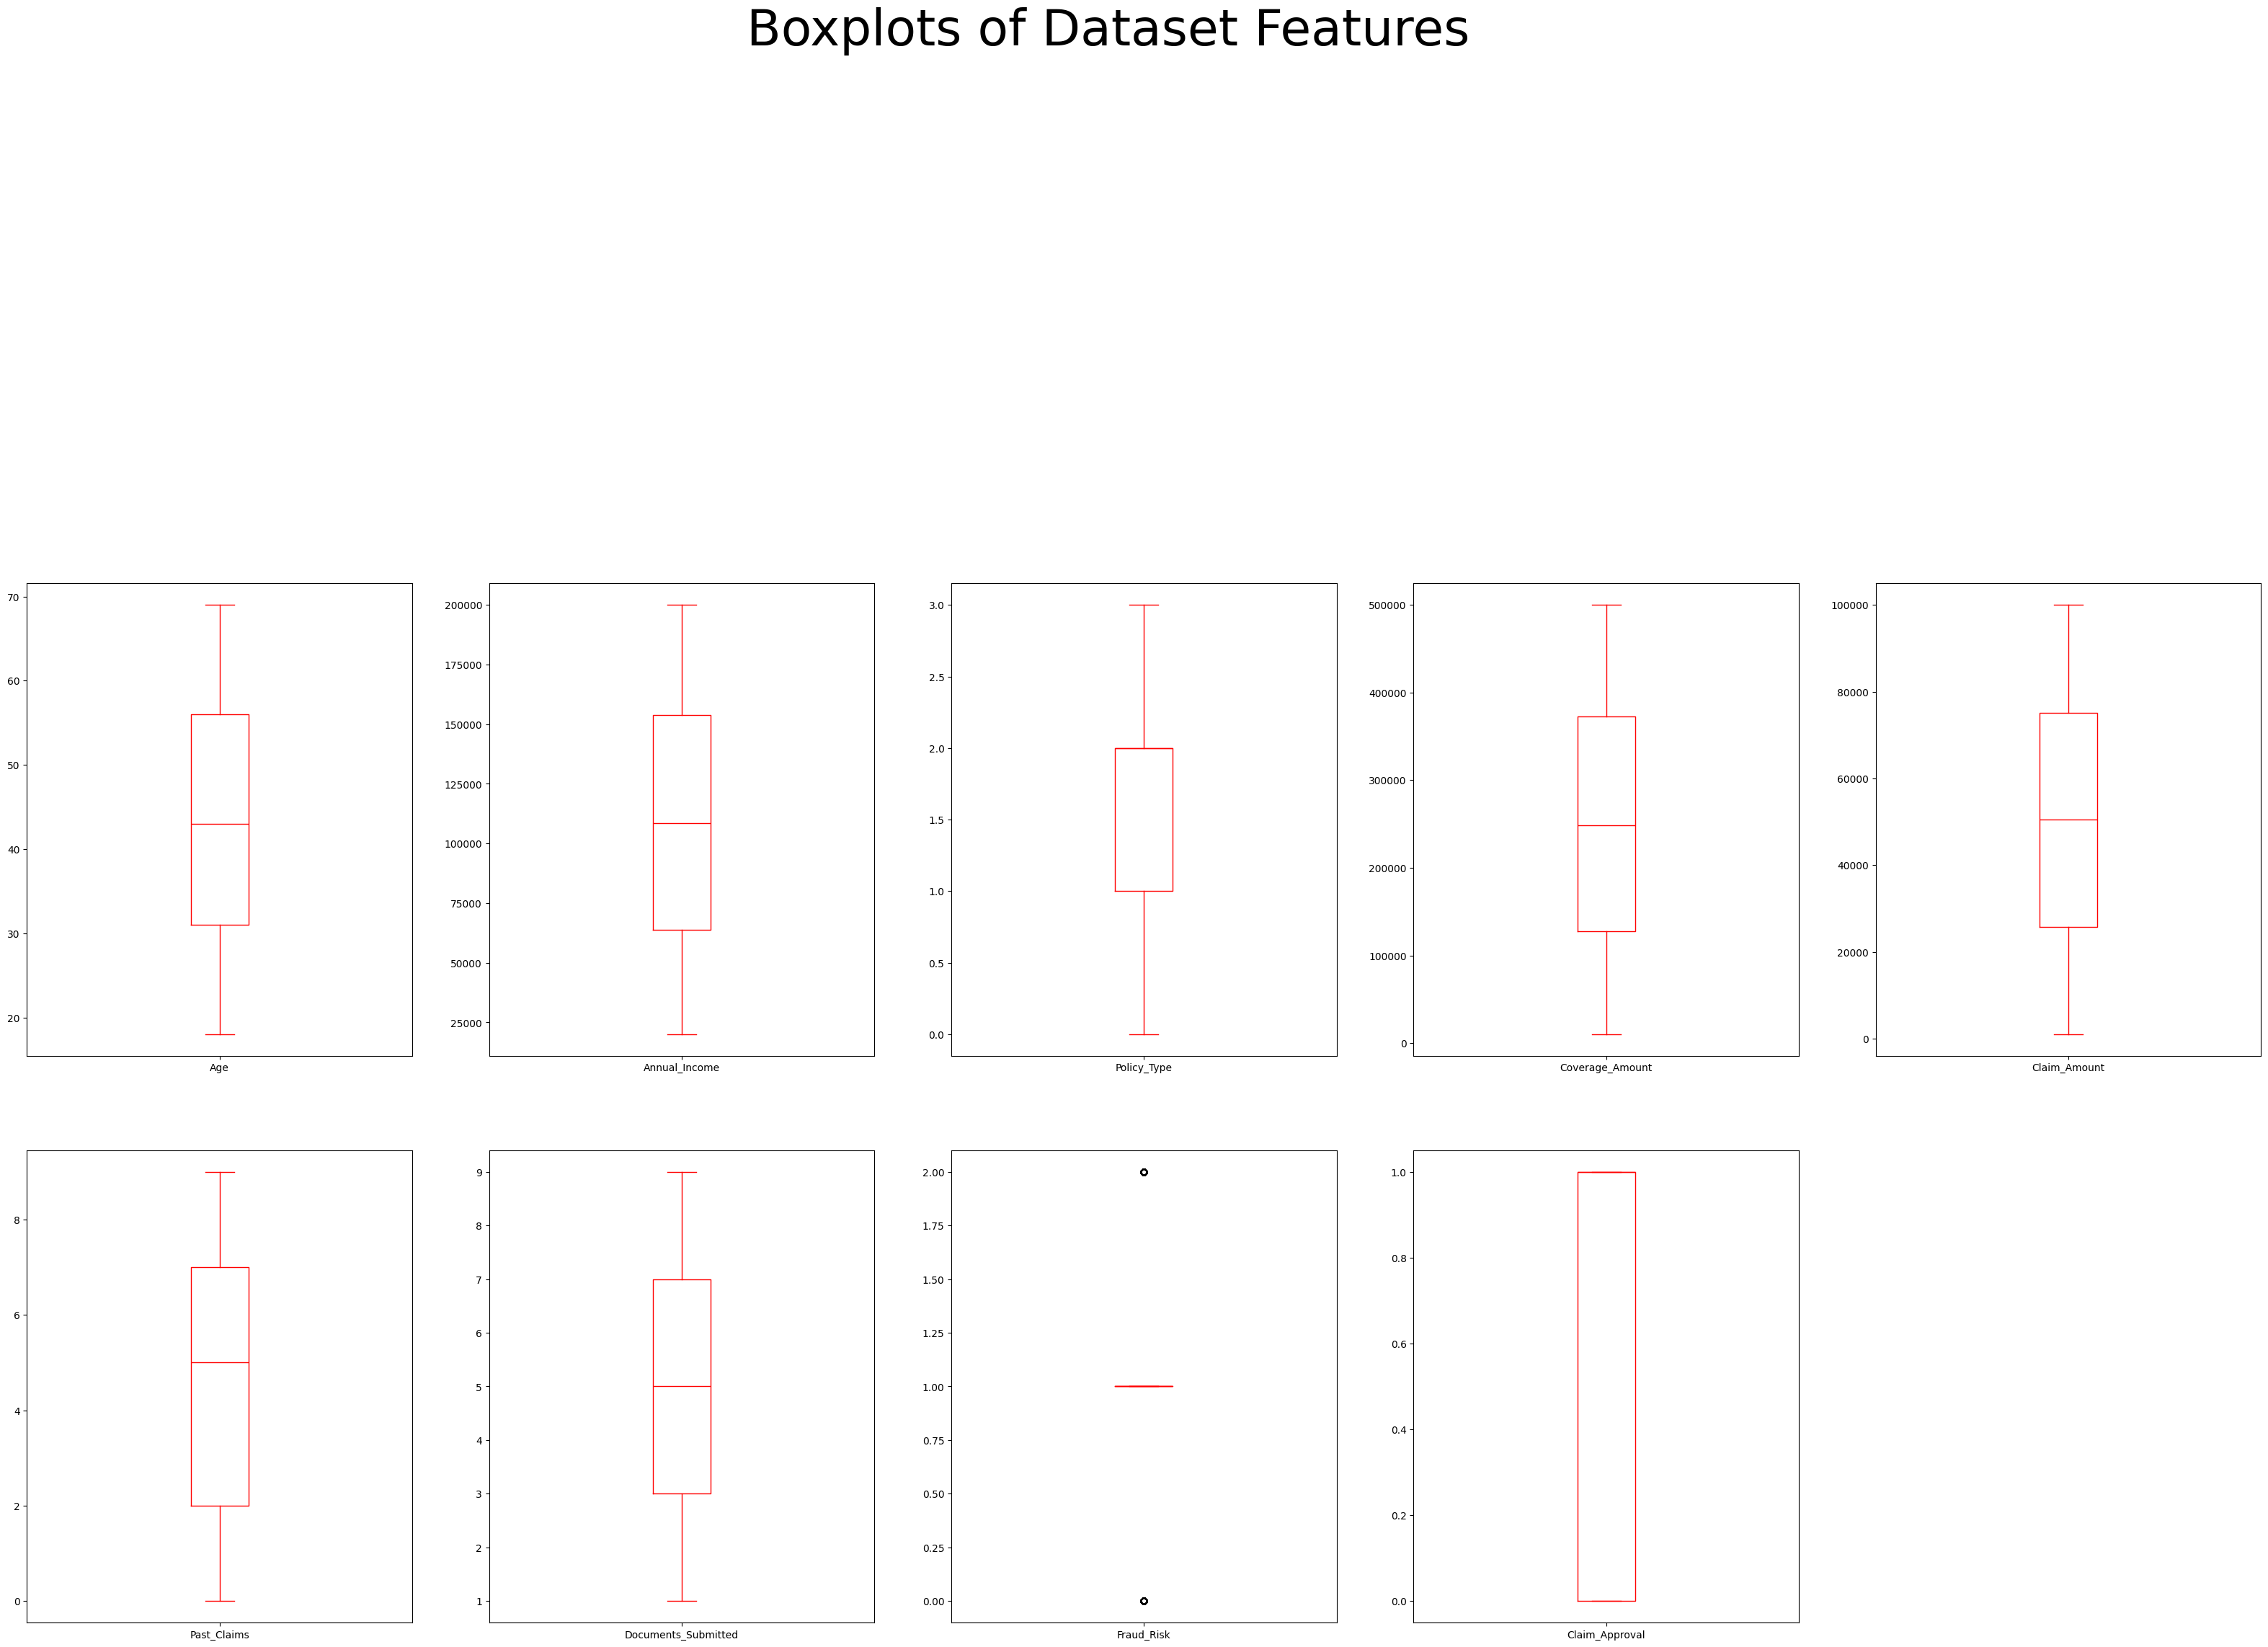

In [23]:
data.plot(kind='box', subplots=True, layout=(8, 5), figsize=(40, 80), color='red')
plt.suptitle('Boxplots of Dataset Features', fontsize=50)
plt.show()

<Axes: >

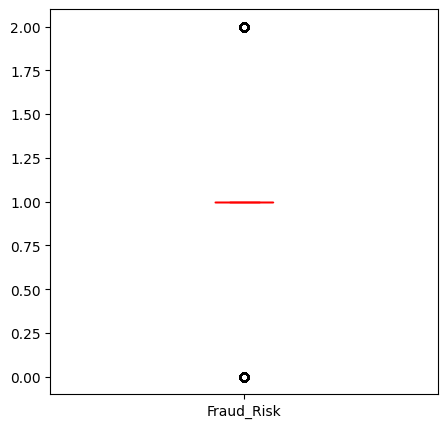

In [24]:
data['Fraud_Risk'].plot(kind='box',  layout=(1, 0), figsize=(5, 5), color='red')

In [25]:
x=data.drop("Claim_Approval",axis=1)
y=data['Claim_Approval']

In [26]:
x

,Age,Annual_Income,Policy_Type,Coverage_Amount,Claim_Amount,Past_Claims,Documents_Submitted,Fraud_Risk
0,56,178721,1,27552,33684,6,7,1
1,69,32402,0,321882,67808,2,3,1
2,46,122880,2,26438,59474,1,3,1
3,32,139764,0,278921,91288,1,2,1
4,60,160288,1,106794,13416,9,9,0
...,...,...,...,...,...,...,...,...
9995,55,140347,1,363330,83181,5,4,1
9996,51,198042,1,308337,65288,6,1,2
9997,57,127780,2,84404,81900,6,6,1
9998,64,96174,0,490830,81183,2,9,1


In [27]:
y

0       0
1       1
2       0
3       0
4       0
       ..
9995    1
9996    0
9997    1
9998    1
9999    0
Name: Claim_Approval, Length: 10000, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
print('x_train_shape',x_train.shape)
print('x_test_shape',x_test.shape)
print('y_train_shape',y_train.shape)
print('y_test_shape',y_test.shape)

x_train_shape (8000, 8)
x_test_shape (2000, 8)
y_train_shape (8000,)
y_test_shape (2000,)


In [31]:
count=y_train.value_counts()
count

Claim_Approval
1    5095
0    2905
Name: count, dtype: int64

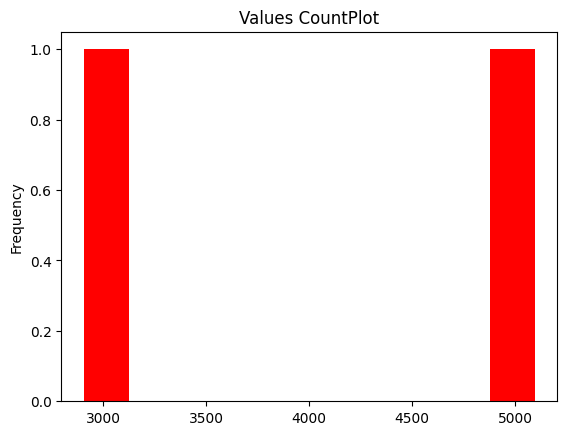

In [32]:
count.plot(kind='hist',color='red')
plt.title("Values CountPlot")
plt.show()

In [33]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_train,y_train=smote.fit_resample(x_train,y_train)

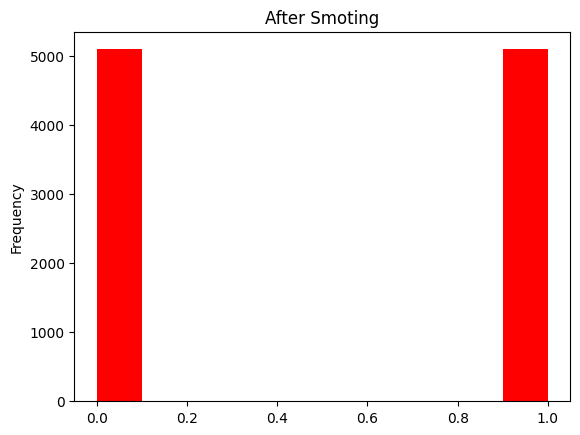

In [34]:
y_train.plot(kind='hist',color='red')
plt.title("After Smoting")
plt.show()

In [35]:
# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


models = {
"Logistic Regression": LogisticRegression(max_iter=1000),
 "Decision Tree": DecisionTreeClassifier(),
 "Random Forest": RandomForestClassifier(),
 "Gradient Boosting": GradientBoostingClassifier(),
 "AdaBoost": AdaBoostClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
}


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Define models that require scaling
scale_sensitive_models = ["LogisticRegression", "SVC", "KNeighborsClassifier"]

def evaluate_classification(model, x_test, y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    return acc, prec, rec, f1

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

results = {}

# Train and evaluate models
for name, model in models.items():
    
     # Fit and predict with appropriate data
    if name in scale_sensitive_models:
        model.fit(x_train_scaled, y_train)
        y_pred = model.predict(x_test_scaled)
    else:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
    
    acc, prec, rec, f1 = evaluate_classification(model, x_test, y_test, y_pred)
    results[name] = {
        "Accuracy": round(acc, 3), # for only 3 decimal points
        "Precision": round(prec, 3),
        "Recall": round(rec, 3),
        "F1": round(f1, 3)
    }

# Convert results dict to DataFrame
results_df = pd.DataFrame(results).T.sort_values(by="Accuracy", ascending=False)

print(results_df)


                        Accuracy  Precision  Recall     F1
Random Forest              0.996      0.996   0.996  0.996
Gradient Boosting          0.995      0.995   0.995  0.995
Decision Tree              0.993      0.993   0.993  0.993
XGBoost                    0.993      0.993   0.993  0.993
AdaBoost                   0.980      0.979   0.980  0.979
Logistic Regression        0.790      0.790   0.790  0.790
Naive Bayes                0.741      0.755   0.741  0.744
Support Vector Machine     0.714      0.712   0.714  0.683
K-Nearest Neighbors        0.596      0.614   0.596  0.602


In [37]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Define the base XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    objective='multi:softmax',   # for multiclass classification
    num_class=len(np.unique(y_train)),  # number of classes
    eval_metric='mlogloss',      # multiclass log loss
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

# Define hyperparameter search space
param_dist = {
    'n_estimators': np.arange(50, 500, 50),       # number of boosting rounds
    'learning_rate': np.linspace(0.01, 0.2, 10),  # shrinkage step size
    'max_depth': [3, 4, 5, 6],                    # tree depth
    'subsample': [0.6, 0.8, 1.0],                 # row sampling
    'colsample_bytree': [0.6, 0.8, 1.0],          # feature sampling
    'gamma': [0, 0.1, 0.2, 0.5],                  # min loss reduction
    'reg_alpha': [0, 0.01, 0.1, 1],               # L1 regularization
    'reg_lambda': [1, 1.5, 2, 3]                  # L2 regularization
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=30,              # try 30 random combos
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit the model
random_search.fit(x_train, y_train)

# Best parameters
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate on test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)

from sklearn.metrics import classification_report, accuracy_score
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Hyperparameters: {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0.01, 'n_estimators': np.int64(150), 'max_depth': 6, 'learning_rate': np.float64(0.07333333333333333), 'gamma': 0.2, 'colsample_bytree': 0.8}
Test Accuracy: 0.9955

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       719
           1       1.00      0.99      1.00      1281

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [38]:
best_model = random_search.best_estimator_
print(best_model)
y_pred = best_model.predict(x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="weighted")
rec = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"RandomizedSearchCV Based Tuned LogisticRegression --> Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1: {f1:.3f}")

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=0.2,
              grow_policy=None, importance_type=None,
              interaction_constraints=None,
              learning_rate=np.float64(0.07333333333333333), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=np.int64(150), n_jobs=-1,
              num_class=2, ...)
RandomizedSearchCV Based Tuned LogisticRegression --> Accuracy: 0.996, Precision: 0.996, Recall: 0.996, F1: 0.996


In [39]:
y_pred=best_model.predict(x_test)
y_pred


array([0, 1, 1, ..., 1, 1, 0], shape=(2000,), dtype=int32)

In [41]:
from sklearn.metrics import  accuracy_score,classification_report,confusion_matrix

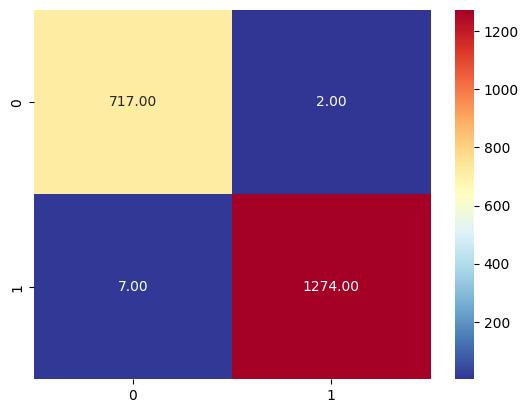

In [42]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,cmap='RdYlBu_r',annot=True,fmt='0.2f')
plt.show()

In [43]:
import joblib

# model
joblib.dump(best_model,'model.pkl')

# Encodes
joblib.dump(le,'le.pkl')
joblib.dump(oe,'oe.pkl')

['oe.pkl']